<a href="https://colab.research.google.com/github/royn5618/EP_23_Intro_to_ML_Workshop/blob/main/Notebooks/Binary_Classification_Hotel_Demand_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import warnings
warnings.filterwarnings('ignore')

# Objective:

Predict hotel calcellations.

Dataset Link: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

# Imports

Install programming libraries.



```
!pip install <library_name>
import <library_name>
```



In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

# Load Dataset

Read the dataset using Pandas Library

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [22]:
df = pd.read_csv('data/hotel_cancellation.csv')

In [23]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


# Recommended EDA Steps

1. Check the shape of the data
2. Check data types
3. Check missing numbers
- Bonus: Try this library https://github.com/ResidentMario/missingno

4. Use Pandas's decribe function to see the ranges and distrbutions of the features - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [24]:
df.shape

(119390, 32)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [26]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [27]:
import missingno as msno
msno.matrix(df)

ModuleNotFoundError: No module named 'missingno'

In [28]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Analyze Numeric Features

1. Notice that there are many numeric features.
2. Assess them using

- box plots: https://seaborn.pydata.org/generated/seaborn.boxplot.html
- categorical box plots: https://seaborn.pydata.org/generated/seaborn.catplot.html
- scatterplots: https://seaborn.pydata.org/generated/seaborn.scatterplot.html


In [29]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

<Axes: xlabel='lead_time'>

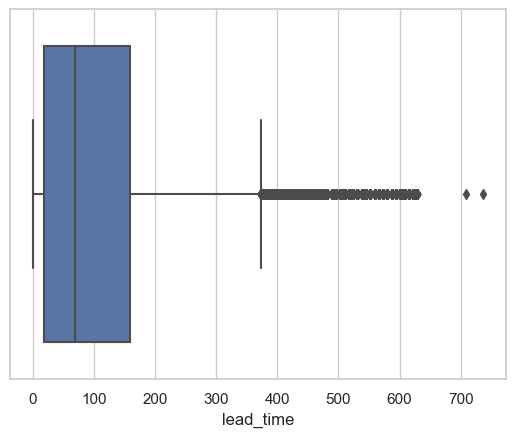

In [30]:
sns.boxplot(df, x='lead_time')

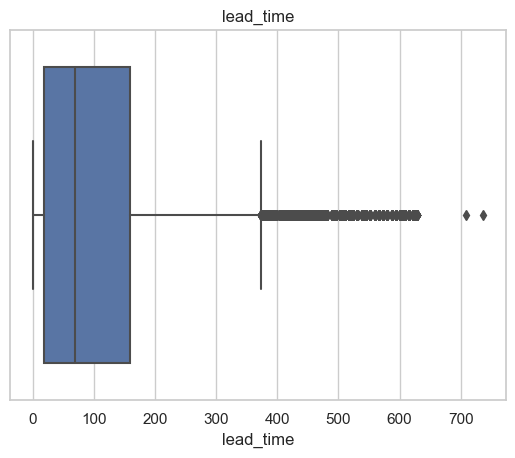

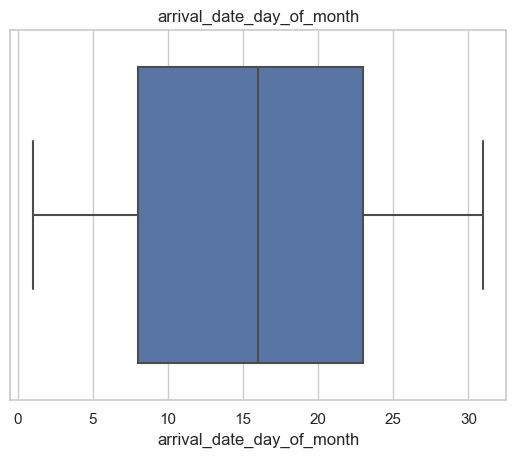

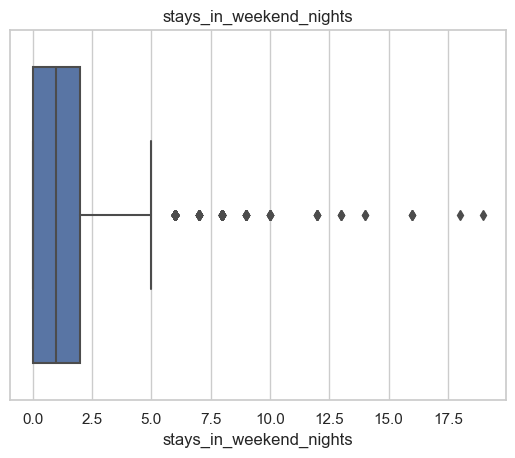

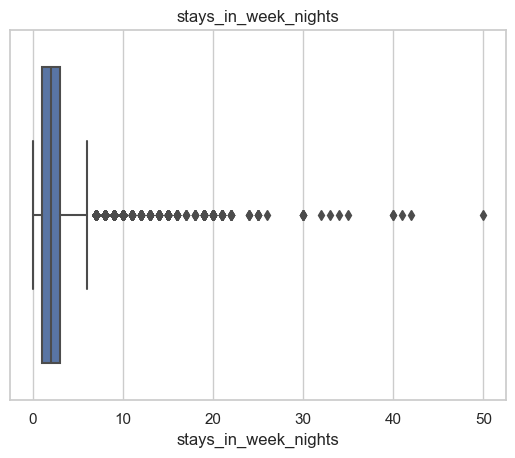

In [31]:
# Use for loop
selected_columns = ['lead_time', 'arrival_date_day_of_month', 	'stays_in_weekend_nights', 	'stays_in_week_nights']

for col_name in selected_columns:
  sns.boxplot(df, x=col_name)
  plt.title(col_name)
  plt.show()

# Analyze Categorical Features

1. Assess cardinality of the categorical features - https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
2. Use bar charts for assessing them
3. Also, use in conjunction with the numeric features using various catplot types to assess their interactions.

In [32]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [33]:
df['arrival_date_year'].value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [34]:
# Use for loop

categorical_columns = ['adults', 'children', 'babies', 'meal', 'country']

for each_col in categorical_columns:
  print(each_col)
  print(df[each_col].value_counts())
  print()

adults
2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

babies
0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64



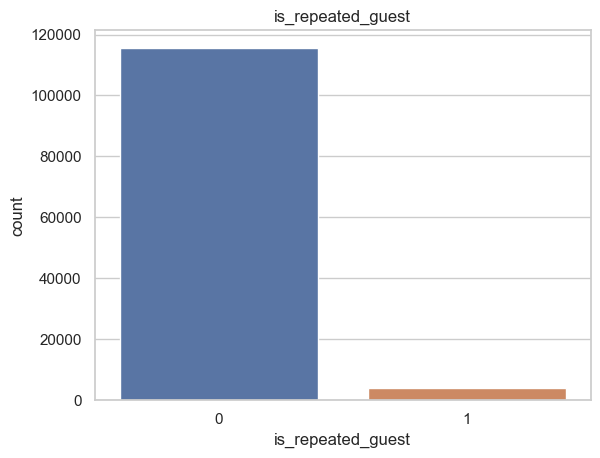

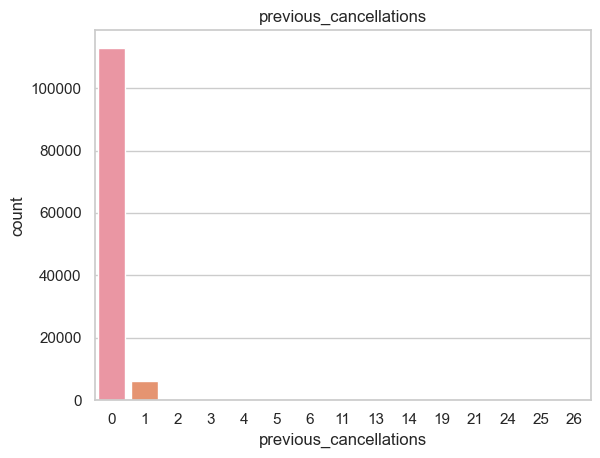

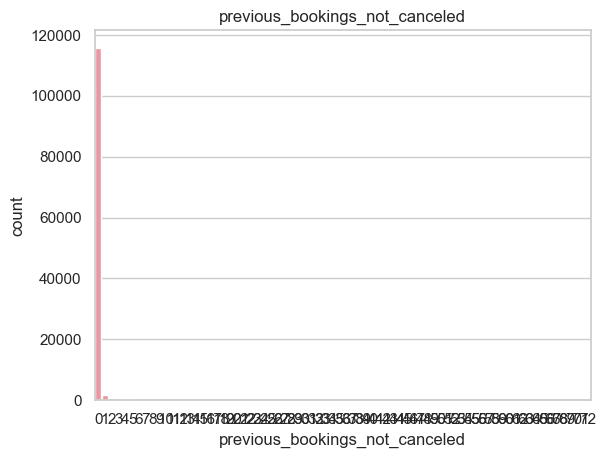

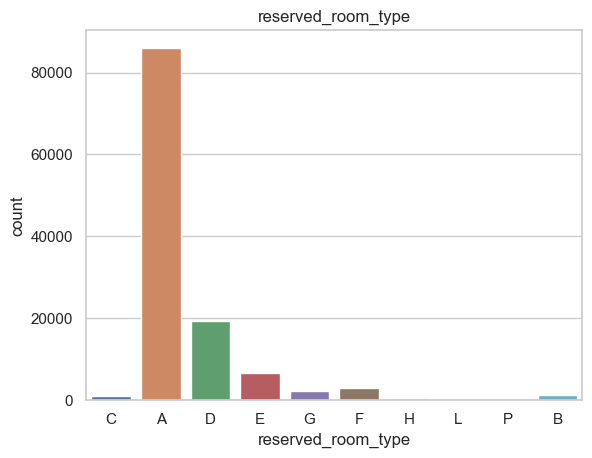

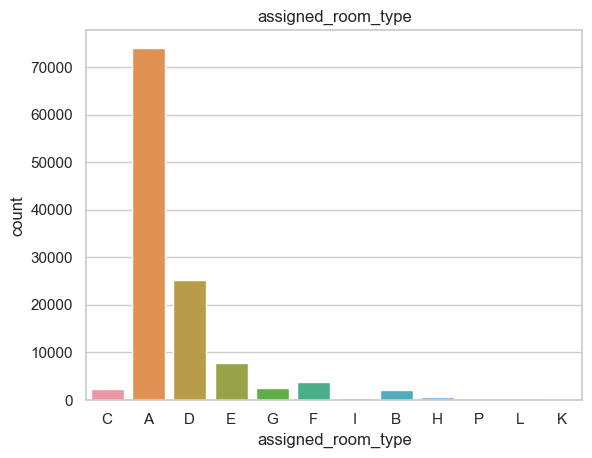

In [35]:
# Use for loop

categorical_columns = ['is_repeated_guest', 'previous_cancellations',
                       'previous_bookings_not_canceled', 'reserved_room_type',
                       'assigned_room_type']

for each_col in categorical_columns:
  sns.countplot(df, x=each_col)
  plt.title(each_col)
  plt.show()

# Target Analysis

Investigate the column 'is_cancelled' since we will be predicting hotel cancellations.

Steps:
1. Assess number of target classes
2. Assess the distribution of the target class and determine whether balanced or unbalanced.

Read: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [36]:
target_col = 'is_canceled'

<Axes: xlabel='is_canceled', ylabel='count'>

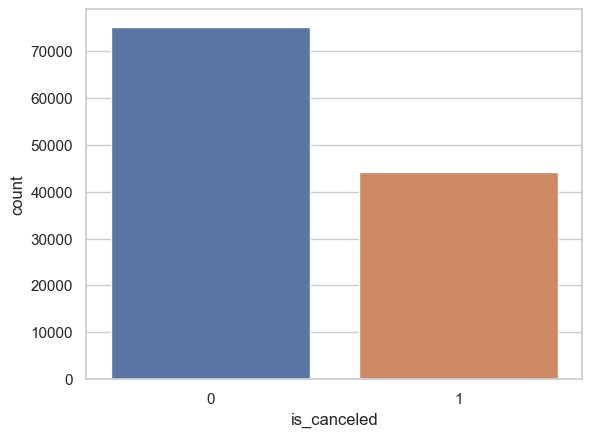

In [37]:
sns.countplot(df, x=target_col)

# Formulate a atleast three to five questions to investigate the dataset

Sample:
1. Is there any seasonality in booking?
2. How often are regular guests cancelling?
3. How does the average daily price change by room type?
4. Is there any realtion with the room type and meal selections to cancellations?
5. Which are the busiest months and which months have the most cancellations?

# Assess Correlation

Heatmaps are the most common methods of assessing correlation between two features
https://seaborn.pydata.org/generated/seaborn.heatmap.html

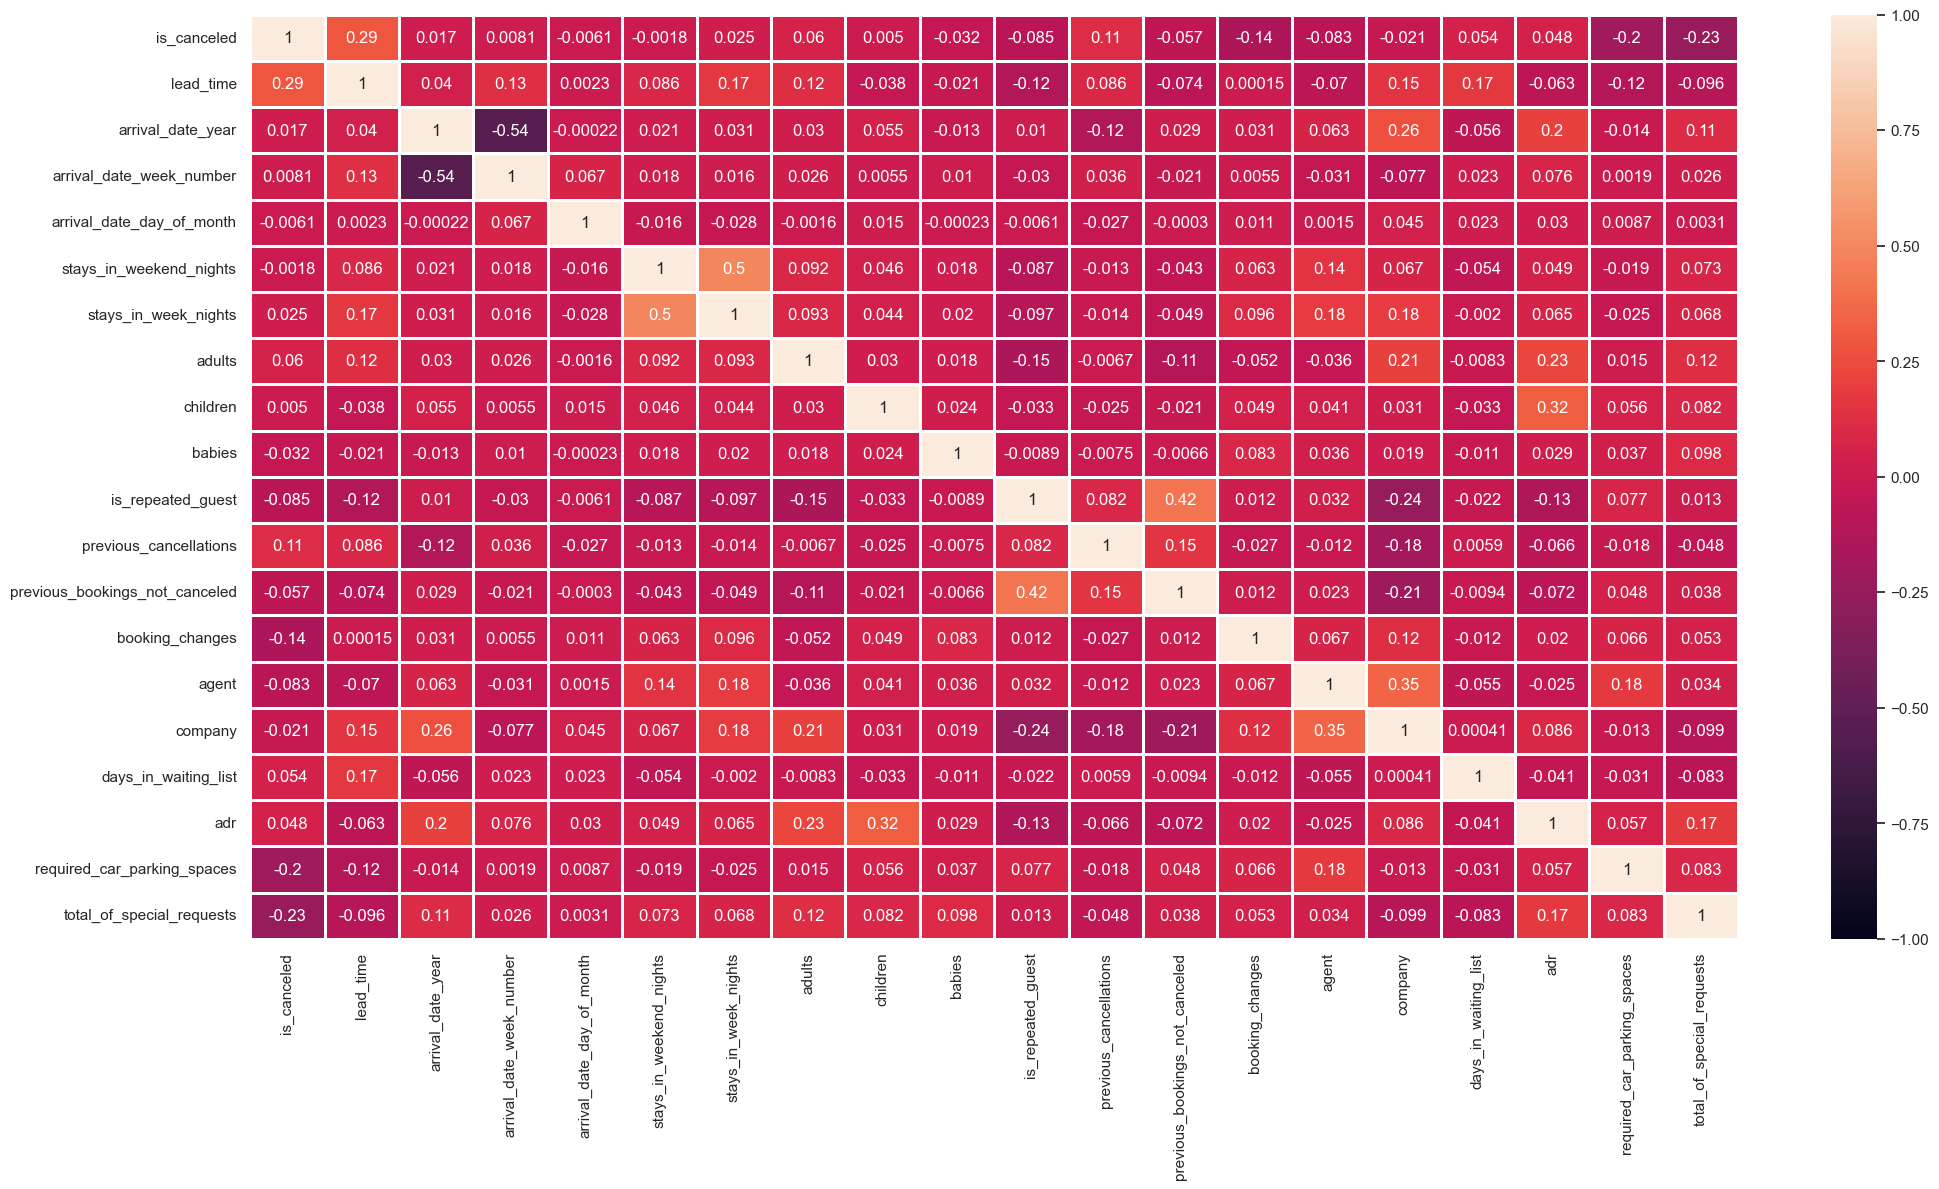

In [38]:
plt.figure(figsize = (24, 12))  # Uncomment this to format the size of the plot
corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1, vmin=-1, vmax=1)
plt.show()

We are assessing 'is_canceled' column which doesn't seem to have anu strong positive or negative correlation. Why?

- This is a binary variable which is not assessed using heatmaps. Hence, selecting numeric features and using them for correlation analysis makes the most sense.

- For categorical variables, categorical plots are more suited like bar charts, categorical box plots, and similar or assessing relationships.

# Encoding Categorical Variables

Encoding techniques:

1. Pandas map: https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html

2. Scikit Learn: Label Encoder: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [39]:
list_categorical_variables = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']

In [40]:
# Example: Pandas Map

df['hotel_le'] = df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

In [41]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,hotel_le
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015,0


In [42]:
# Example: Label Encoder

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['meal'])

LabelEncoder()

In [43]:
df['meal_le'] = list(le.transform(df['meal']))

In [44]:
df[['meal', 'meal_le']].head(10)

,meal,meal_le
0,BB,0
1,BB,0
2,BB,0
3,BB,0
4,BB,0
5,BB,0
6,BB,0
7,FB,1
8,BB,0
9,HB,2


In [45]:
# One Hot Ending

# Example: Dummy Variables


# Example: Scikit Learn
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(df[['meal', 'meal_le']])

OneHotEncoder()

In [46]:
enc.categories_

[array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object),
 array([0, 1, 2, 3, 4])]

In [47]:
# transform
ont_hot_array = enc.transform(df[['meal', 'meal_le']]).toarray()
ont_hot_array

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [48]:
ont_hot_array.shape[1]

10

In [49]:
ont_hot_array

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [50]:
num_features = ont_hot_array.shape[1]
print("Number of encoded columns to add: ", num_features)
new_enc_col_names = ['meal' + '_enc_' + str(num) for num in range(0, num_features)]
df_enc = pd.DataFrame(ont_hot_array)
df_enc.columns = new_enc_col_names
df = pd.concat([df, df_enc], axis=1)
df.head()

Number of encoded columns to add:  10


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,meal_enc_0,meal_enc_1,meal_enc_2,meal_enc_3,meal_enc_4,meal_enc_5,meal_enc_6,meal_enc_7,meal_enc_8,meal_enc_9
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [51]:
df[['meal', 'meal_le']].head(10)

,meal,meal_le
0,BB,0
1,BB,0
2,BB,0
3,BB,0
4,BB,0
5,BB,0
6,BB,0
7,FB,1
8,BB,0
9,HB,2


# Feature Selection

Strategies:
1. Drop the columns which has a high rate of mssing data.
2. Drop the rows that has missing critical data
3. Select features which are key indicators from domain knowledge
4. Forward or Backward Selection
5. Reverse Engineer - Try predicting the target variable and analyse the important featurs that you get from the classifier.

# Train Test Split

Best Practice: Avoid splitting after transformations. So here we take a fresh dataset and split them.

Here are the steps:

1. clean
2. select features
3. split
4. transform
5. Train model
6. Evaluate model
7. Tune model
8. Evaluate tuned model


## Restart - Load and clean

In [52]:
df_hotel = pd.read_csv('data/hotel_cancellation.csv')
df_hotel.shape

(119390, 32)

In [53]:
df_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [54]:
df_hotel['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [55]:
target =  'is_canceled'
cat_features = ['hotel', 'meal', 'market_segment', 'distribution_channel',
                'is_repeated_guest', 'reserved_room_type','deposit_type',
                'customer_type', 'arrival_date_month']

num_features = ['lead_time', 'arrival_date_week_number', 'booking_changes',
                'arrival_date_day_of_month', 'days_in_waiting_list',
                'adr', 'adults', 'required_car_parking_spaces',
                'total_of_special_requests']

In [56]:
df_hotel[cat_features].head()

,hotel,meal,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,deposit_type,customer_type,arrival_date_month
0,Resort Hotel,BB,Direct,Direct,0,C,No Deposit,Transient,July
1,Resort Hotel,BB,Direct,Direct,0,C,No Deposit,Transient,July
2,Resort Hotel,BB,Direct,Direct,0,A,No Deposit,Transient,July
3,Resort Hotel,BB,Corporate,Corporate,0,A,No Deposit,Transient,July
4,Resort Hotel,BB,Online TA,TA/TO,0,A,No Deposit,Transient,July


In [57]:
df_hotel[num_features].head()

,lead_time,arrival_date_week_number,booking_changes,arrival_date_day_of_month,days_in_waiting_list,adr,adults,required_car_parking_spaces,total_of_special_requests
0,342,27,3,1,0,0.0,2,0,0
1,737,27,4,1,0,0.0,2,0,0
2,7,27,0,1,0,75.0,1,0,0
3,13,27,0,1,0,75.0,1,0,0
4,14,27,0,1,0,98.0,2,0,1


In [58]:
# Remove rows with adult zero

df_hotel = df_hotel[df_hotel['adults'] != 0]
df_hotel.shape

(118987, 32)

In [59]:
# Remove rows that has 'adr' <= 0

df_hotel = df_hotel[df_hotel['adr'] > 0]

## Train and Test Split

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [60]:
# cat_features + num_features

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_hotel[cat_features + num_features],
                                                    df_hotel[target], test_size=0.33, random_state=42)

In [62]:
X_train.shape, y_train.shape

((78511, 18), (78511,))

In [63]:
X_test.shape, y_test.shape

((38671, 18), (38671,))

In [64]:
# X_train

## Apply Label Encoder on both - Train and Test sets

In [65]:
# Categorical Features

for each_column in cat_features:
  le = preprocessing.LabelEncoder()
  le.fit(X_train[each_column])
  X_train[each_column] = list(le.transform(X_train[each_column]))
  X_test[each_column] = list(le.transform(X_test[each_column]))
  # print(X_train[each_column])
  # print(X_test[each_column])

In [66]:
# Check the encoding for the target variable

y_train, y_test

(57525     1
 112625    0
 70045     1
 67631     1
 78449     0
          ..
 78059     0
 112399    0
 105717    0
 879       0
 16016     0
 Name: is_canceled, Length: 78511, dtype: int64,
 823       1
 116783    0
 56767     1
 34942     0
 16765     0
          ..
 7474      1
 57996     1
 13623     1
 46439     0
 5002      1
 Name: is_canceled, Length: 38671, dtype: int64)

# kNN

1. Take the sample of the initial dataset (Hint: use `resample` method from sklearn.utils
2. Normalize data
3. Find best k value (from test split or using `GridSearchCV`

In [67]:
from sklearn.utils import resample

X_train_s = resample(X_train, n_samples=1000, random_state=0)
y_train_s = resample(y_train, n_samples=1000, random_state=0)
X_train_s.shape

(1000, 18)

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_s_scaled = scaler.fit_transform(X_train_s)
X_test_s_scaled = scaler.transform(X_test)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

param_grid = {
        'n_neighbors': range(1, 50),
        'p': range(1, 4)
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(X_train_s_scaled, y_train_s)

print("Best CV score: {:.3f}, best CV k: {}".format(
    grid_search.best_score_, grid_search.best_estimator_.n_neighbors)
) 


test_predictions = grid_search.best_estimator_.predict(X_test_s_scaled)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions, y_test)))

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best CV score: 0.658, best CV k: 17
Resulting test score: 0.619


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7596907243153784
Confusion Matrix : 
[[21346  2799]
 [ 6494  8032]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.77      0.88      0.82     24145
           1       0.74      0.55      0.63     14526

    accuracy                           0.76     38671
   macro avg       0.75      0.72      0.73     38671
weighted avg       0.76      0.76      0.75     38671



# Decision Trees

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.8117710946187066
Confusion Matrix : 
[[20499  3646]
 [ 3633 10893]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     24145
           1       0.75      0.75      0.75     14526

    accuracy                           0.81     38671
   macro avg       0.80      0.80      0.80     38671
weighted avg       0.81      0.81      0.81     38671



# Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

In [ ]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.8501461043158957
Confusion Matrix : 
[[22112  2033]
 [ 3762 10764]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     24145
           1       0.84      0.74      0.79     14526

    accuracy                           0.85     38671
   macro avg       0.85      0.83      0.84     38671
weighted avg       0.85      0.85      0.85     38671



## Evaluate Feature Importances

In [ ]:
rd_clf.feature_importances_

array([0.01357439, 0.01721617, 0.05486458, 0.01243117, 0.00313129,
       0.02458691, 0.15913998, 0.02689236, 0.03612297, 0.20032607,
       0.07501984, 0.02533585, 0.09905616, 0.00332976, 0.13800554,
       0.01710332, 0.02373289, 0.07013075])

# Retest Random Forest with Other Settings

# Tuning - Grid Search